## Group: Jingmin Chen, Tinayu Sun

# Introdoctions

I'll construct a series of KNN models and SVM models to predict wheather or not a given mortgate application is likely to be denied as what data scientists do. To achieve this, I'll perform my work on the dataset of the Federal Reserve Bank of Boston. My work will roughly split into 6 steps.

1.  featch the dataset and load them to `pandas`
2.  understand meanings of each explanatory variables
3.  perform necessary EDA to gain useful information for further work
4.  perform data preparation on the dataset to get a useable format of the dataset
5.  perform variable selection to get several subsets
6.  perform train-test split on these subsets to get several train sets and test sets. And then train models on them

What's more, the deatail of each step will be given bellow.

In [1]:
# load python libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import normalized_mutual_info_score, accuracy_score, make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

## Loading dataset and understanding on features

In this part I'll fetch the dataset and load it into Python. And then I'll read the explanations of each variable through the internet.

In [2]:
# load data from file
# ignore first column as index
data = pd.read_csv('https://raw.githubusercontent.com/TTZUO/DAV-6150/master/M7_Data.csv', index_col=0)
# show the first 5 rows of data
data.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


Here I'll show some basic attributes of the dataset.

In [7]:
# print the shape and columns name
print(data.shape)
print(data.columns)

(2381, 13)
Index(['dir', 'hir', 'lvr', 'ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single',
       'uria', 'comdominiom', 'black', 'deny'],
      dtype='object')


We can see that there are 2381 observations and 13 variables in this dataset. The respoinse variable is `deny` and others are explanatory variables.
Here are the meanings of each variables I found on internet:

-   dir: debt payments to total income ratio

-   hir: housing expenses to income ratio

-   lvr: ratio of size of loan to assessed value of property

-   ccs: consumer credit score from 1 to 6 (a low value being a good score)

-   mcs: mortgage credit score from 1 to 4 (a low value being a good score)

-   pbcr: public bad credit record ?

-   dmi: denied mortgage insurance ?

-   self: self employed ?

-   single: is the applicant single ?

-   uria: 1989 Massachusetts unemployment rate in the applicant's industry

-   condominium: is unit a condominium ? (was called comdominiom in version -  0.2-9 and earlier versions of the package)

-   black: is the applicant black ?

-   deny: mortgage application denied ?

And we can see that some variables are categorial data and some are continuous data.


## EDA

I think the EDA work I have already done in assignment 7 is enough for further work, so I'll do what I have done in assignment 7.

In [4]:
# look at type of variables
data.dtypes

dir            float64
hir            float64
lvr            float64
ccs            float64
mcs            float64
pbcr            object
dmi             object
self            object
single          object
uria           float64
comdominiom      int64
black           object
deny            object
dtype: object

In [3]:
# look at some statistic results on continuous variables
data.describe()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


In [8]:
# count values for each attribute
for f in ['ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single', 'comdominiom', 'black', 'deny']:
    print(data[f].value_counts())
    print()

1.000000    1353
2.000000     441
6.000000     201
5.000000     182
3.000000     126
4.000000      77
2.116387       1
Name: ccs, dtype: int64

2.000000    1571
1.000000     747
3.000000      41
4.000000      21
1.721008       1
Name: mcs, dtype: int64

no     2205
yes     175
Name: pbcr, dtype: int64

no     2333
yes      48
Name: dmi, dtype: int64

no     2103
yes     277
Name: self, dtype: int64

no     1444
yes     937
Name: single, dtype: int64

0    1695
1     686
Name: comdominiom, dtype: int64

no     2042
yes     339
Name: black, dtype: int64

no     2096
yes     285
Name: deny, dtype: int64



From the result in assignment 7 I know that `ccs`, `mcs`, `pbcr`, `dmi`, `self`, `single`, `comdominiom`, `black`, `deny` are categorial and `dir`, `hir`, `lvr`, `uria` are continuous variables. What's more, there are 2 invalid data entries in `pbcr` and `self`.

And we can see that there are 2 outliers in `ccs` and `mcs`. From other observations in `ccs` and `mcs` we know that these attributes are indicates some kind of level, so float number is not possible

In [ ]:
# remove outliers in `ccs` and `mcs`
data.mcs[(data.mcs > 1) & (data.mcs < 2)] = round(data.mcs[(data.mcs > 1) & (data.mcs < 2)])
data.ccs[(data.ccs > 2) & (data.ccs < 3)] = round(data.ccs[(data.ccs > 2) & (data.ccs < 3)])

And then, I'll perform some visualization on the dataset to see distributions of each variable. At first, I'll visualize categroial variables.

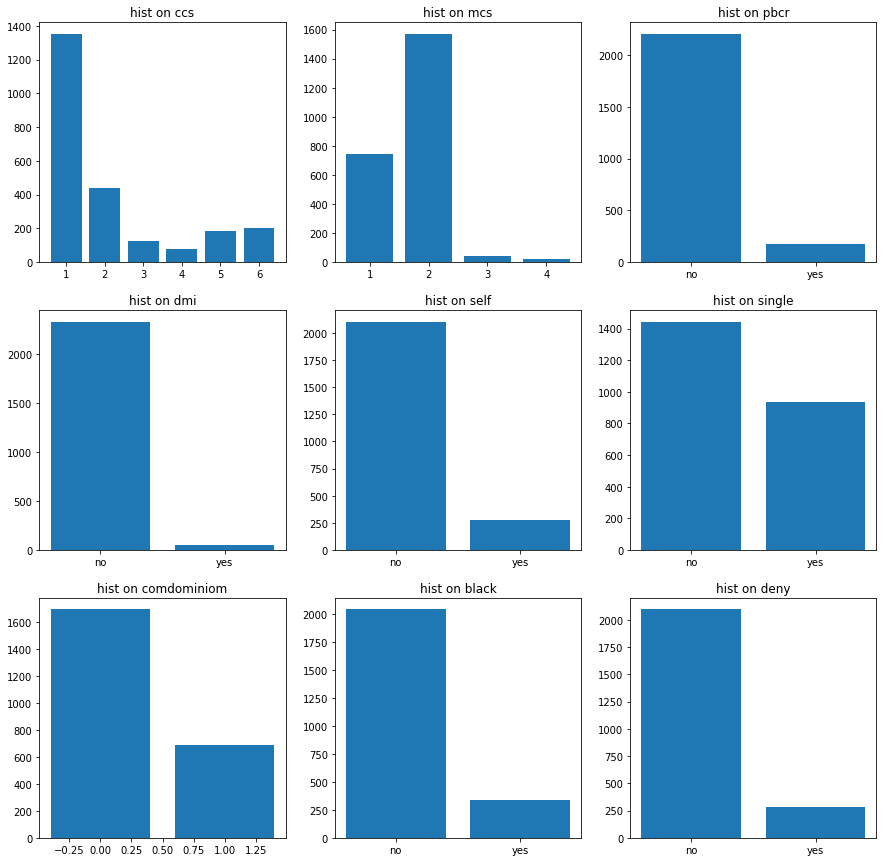

In [9]:
# visualize categroial variables
fig = plt.figure(figsize=(15, 15))

i = 1
for f in ['ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single', 'comdominiom', 'black', 'deny']:
    plt.subplot(3, 3, i)    

    vc = data[f].value_counts()
    plt.bar(vc.index, vc.values)
    plt.title('hist on {}'.format(f))

    i += 1
plt.show()

conclusion
We can find that the distribution of each categorial variable is skewed. Observations of no (for comdominiom is 0) is more then yes (for comdomniom is 1). This will provide indication on data preparation.

What's more, the response variable is also skewed.



And then I'll explore distributions of continuous variables.

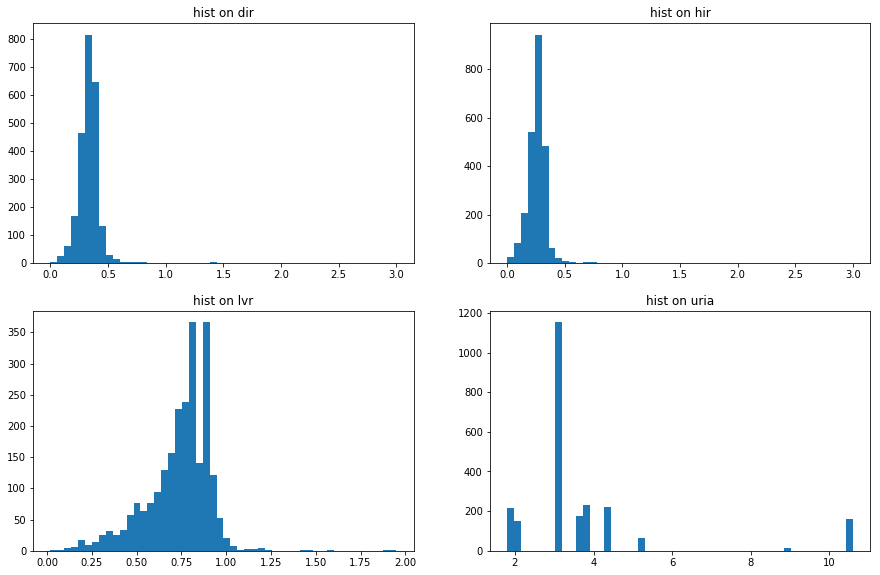

In [10]:
# visualize continuous variables
fig = plt.figure(figsize=(15, 15))
i = 1
for f in ['dir', 'hir', 'lvr', 'uria']:
    plt.subplot(3, 2, i)
    plt.hist(data[f], bins=50)
    plt.title('hist on {}'.format(f))

    i += 1
plt.show()

### conclusion
We can see that dir and hir seems to obey a normal distribution, but lvr is skewed and uria seems not obey a normal distribution.

What's more, I'll explore relationships between continuous variables.

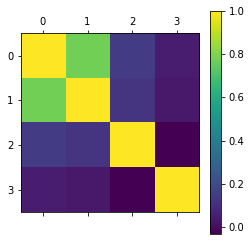

In [11]:
features = ['dir', 'hir', 'lvr', 'uria']
# find the correlation for continuous variables
corr_mat = data[features].corr()
plt.matshow(corr_mat)
plt.colorbar()

plt.show()

### conclusion
From the correlation matrix we can see that `dir` and hir have a high relationship then others. They are not isolated on some aspects

Here I'll explore relationships between categorial variables. I'll use NMI score (this score is used to judge dependency between two variables and suitable for categorial data, higher value indicates dependency) to represent the strength of relationship.
https://docs2.w3cub.com/scikit_learn/modules/generated/sklearn.metrics.normalized_mutual_info_score/

NMI on ccs and mcs: 0.029486538935077678
NMI on ccs and pbcr: 0.07162567730115728
NMI on ccs and dmi: 0.004596385297366636
NMI on ccs and self: 0.00818338098501454
NMI on ccs and single: 0.004031020157682561
NMI on ccs and comdominiom: 0.009985118893408052
NMI on ccs and black: 0.031564294196826805

NMI on mcs and pbcr: 0.012794434552810811
NMI on mcs and dmi: 0.00758144655716596
NMI on mcs and self: 0.023245769852553746
NMI on mcs and single: 0.032979487389670166
NMI on mcs and comdominiom: 0.013741099087557197
NMI on mcs and black: 0.023234161006062154

NMI on pbcr and dmi: 0.01528420679728626
NMI on pbcr and self: 0.013053257880906024
NMI on pbcr and single: 0.0009278784663615586
NMI on pbcr and comdominiom: 0.001481446483596183
NMI on pbcr and black: 0.031305877184663114

NMI on dmi and self: 0.0006771505339648917
NMI on dmi and single: 0.0006928220470437765
NMI on dmi and comdominiom: 6.228389882433005e-05
NMI on dmi and black: 0.014385423753706246

NMI on self and single: 0.00138

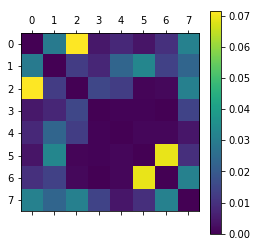

In [12]:
# NMI between categorial variables

features = ['ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single', 'comdominiom', 'black']

tmp_data = data.copy()

nmi_mat = np.zeros((8, 8))

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        
        f1 = features[i]
        f2 = features[j]

        tmp_data[f1][data[f1] == 'no'] = 0
        tmp_data[f1][data[f1] == 'yes'] = 1

        tmp_data[f2][data[f2] == 'no'] = 0
        tmp_data[f2][data[f2] == 'yes'] = 1

        nmi = normalized_mutual_info_score(tmp_data[f1], tmp_data[f2])

        nmi_mat[i, j] = nmi
        nmi_mat[j, i] = nmi

        print('NMI on {} and {}: {}'.format(f1, f2, nmi))
    print()

plt.matshow(nmi_mat)
plt.colorbar()
plt.show()

In [13]:
# NMI between categorial variables and response variable

features = ['ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single', 'comdominiom', 'black']

tmp_data = data.copy()

tmp_data['deny'][tmp_data.deny == 'no'] = 0
tmp_data['deny'][tmp_data.deny == 'yes'] = 1

for i in range(len(features)):
        
    f = features[i]

    if f not in ['ccs', 'mcs']:
        tmp_data[f][data[f] == 'no'] = 0
        tmp_data[f][data[f] == 'yes'] = 1

    nmi = normalized_mutual_info_score(tmp_data[f], tmp_data['deny'])

    print('NMI on {} and deny: {}'.format(f, nmi))
    print()


NMI on ccs and deny: 0.043680744647149716

NMI on mcs and deny: 0.01210960112027829

NMI on pbcr and deny: 0.08233874139299989

NMI on dmi and deny: 0.18391183335684919

NMI on self and deny: 0.003523076835776184

NMI on single and deny: 0.005775637982416272

NMI on comdominiom and deny: 0.0016344101514051254

NMI on black and deny: 0.04383459631128729



### conclusion
From the result we can see that most categorial variables are independent, but ccs and pbcr and single and comdominiom seem to dependent (NMI score greater then 0.5)

What's more, dmi and deny seem to have more relationship because their NMI score is higher then others (0.18).

## Data preparation

Since I performed what I have done in assignment 7 in EDA part, the methods of data preparation will be same with what I have done in assignment 7.

Here are what I'll do in this step:
-   impute empty value based on variable's distribution
-   covert categorial variables to one-hot encoding

It is important that `ccs` and `mcs` will not be converted to one-hot encoding because their values can be compared with each other.

Empty values are disappering in pbcr and self as described above. There are more no in these two variables then yes, and there are only 1 empty value in each variable, so use just no to replace them is ok.

In [7]:
# Impute empty variables

data.pbcr.fillna('no', inplace=True)
data.self.fillna('no', inplace=True)

And then, convert categorial data to one-hot encoding and split explanatory variables and response variable.

In [20]:
# ingore warning
np.warnings.filterwarnings('ignore')
# convert categorial data to one-hot encoding
feature_data = pd.get_dummies(data[['dir', 'hir', 'lvr','pbcr', 'dmi', 'self', 'single',
       'uria', 'comdominiom', 'black']])

label_data = data['deny']
label_data[label_data == 'no'] = 0
label_data[label_data == 'yes'] = 1
label_data = label_data.astype(np.int)

proc_data = pd.concat([feature_data, label_data], axis=1)

After the data preparation, in this case, it is not necessary to confirm that wheather the distributions changed or not, because there are only 2 empty values are imputed which can not incluce the dataset which contains 2381 observations. 

## Variable selection and Train-Test split

These work is same to what I have done in assignment 7. Dataset will be copied 2 times for 2 different KNN models and 2 different SVM models. Each copied dataset will be split into train set and test set with split ratio 0.7. Each dataset will have different explanatory variables. Explanatory variables will be choosen by backward selection. Before this, importance of each variable will be calculated by decision tree.

In [13]:
# copy 3 dataset

data1 = proc_data.copy()
data2 = proc_data.copy()

In [14]:
# calculate variable importance

dt = DecisionTreeClassifier()
dt.fit(feature_data.values, label_data.values)

feature_importance = dt.feature_importances_
print(feature_importance)

[0.20049994 0.17428291 0.28251717 0.06401924 0.02344049 0.
 0.06037804 0.1240201  0.         0.00824132 0.00676959 0.01723977
 0.02506431 0.00530747 0.00821965]


As what I did in assignment 7, I'll generate 3 different subsets based on different variable selection strategy. 

-   full datset with no variable removed
-   perform variable selection with importance higher then 0.01

The first dataset contains all variables


In [15]:
# the first dataset

X_data_1 = data1.iloc[:, :-1]
y_data_1 = data1.iloc[:, -1]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_data_1.values, y_data_1.values, train_size=0.7)


Variable selection on the second dataset will based on variable importance calculated above.

The number of remaining variables will limit at least 5 to sataisy the requirment.

The threshold of selection will be determained manually to sataisfy the requirment. Since some variables in the dataset is converted to one-hot encoding, I'll count the sub-variable as the origin variable (for example, `pbcr` is converted to `pbcr_yes` and `pbcr_no`, if the subset contains `pbcr_yes` or `pbcr_no` or both of them, I'll regard it covers `pbcr`).

In [16]:
# the second dataset


remaining_features = list(feature_data.columns[feature_importance >= 0.01])

# the subset contains at least 5 origin variables
print(len(remaining_features), remaining_features)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data2[remaining_features].values, data2['deny'], train_size=0.7)

9 ['dir', 'hir', 'lvr', 'uria', 'comdominiom', 'pbcr_yes', 'dmi_no', 'single_no', 'single_yes']


## Training models

I'll train 2 different KNN models and 2 different SVM models based on the subsets described above.

I'll use cross validation (5 fold) to test the performance of models on train sets and use accuray score to test the performance of them on test sets. The best model will be selected based on these performance metrics.

In [17]:
# K is equal to 5 and this means it gets 5 accuracies
k = 5

### KNN

I'll train 4 different KNN models on each subset. These KNN models will have different `k` value which range in 2, 3, 5, 7.

In [32]:
# first subset

for k_ in [2, 3, 5, 7]:
    knn1 = KNeighborsClassifier(n_neighbors=k_)

    print('k = {}: '.format(k_))
# use cross_val_score to get the score of accuracy, f1 and AUC
    acc_score = cross_val_score(knn1, X_train_1, y_train_1, cv=k,scoring='accuracy').mean()
    print('Accuracy score: ', acc_score)
    f1_score = cross_val_score(knn1, X_train_1, y_train_1, cv=k,scoring='f1').mean()
    print('F1 score: ', f1_score)
    auc_score = cross_val_score(knn1, X_train_1, y_train_1, cv=k,scoring='roc_auc').mean()
    print('AUC score: ', auc_score)
    print()

k = 2: 
Accuracy score:  0.8961554368739998
F1 score:  0.20199110071412715
AUC score:  0.6466307967809469

k = 3: 
Accuracy score:  0.8865548182913452
F1 score:  0.25768776141116567
AUC score:  0.6776651173422945

k = 5: 
Accuracy score:  0.8955638273003542
F1 score:  0.24014918414918415
AUC score:  0.705785651881748

k = 7: 
Accuracy score:  0.8931596266925608
F1 score:  0.16665927568366595
AUC score:  0.7098766081123438



In [31]:
# second subset

for k_ in [2, 3, 5, 7]:
    knn2 = KNeighborsClassifier(n_neighbors=k_)

    print('k = {}: '.format(k_))
# use cross_val_score to get the score of accuracy, f1 and AUC
    acc_score = cross_val_score(knn2, X_train_2, y_train_2, cv=k,scoring='accuracy').mean()
    print('Accuracy score: ', acc_score)
    f1_score = cross_val_score(knn2, X_train_2, y_train_2, cv=k,scoring='f1').mean()
    print('F1 score: ', f1_score)
    auc_score = cross_val_score(knn2, X_train_2, y_train_2, cv=k,scoring='roc_auc').mean()
    print('AUC score: ', auc_score)
    print()

k = 2: 
Accuracy score:  0.8901602201003398
F1 score:  0.16998654346864
AUC score:  0.6194356413095112

k = 3: 
Accuracy score:  0.888360216503929
F1 score:  0.2079038281979458
AUC score:  0.6347455525660916

k = 5: 
Accuracy score:  0.8889554224883567
F1 score:  0.16401215070044214
AUC score:  0.6480896845141788

k = 7: 
Accuracy score:  0.8913542284799769
F1 score:  0.12346883468834688
AUC score:  0.6658842103308313



### SVM

I'll train 5 different SVM models on each subset, these models have different kernel function (‘linear’, ‘poly’, ‘rbf’ and ‘sigmoid’)



In [30]:
# first subset

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svm1 = SVC(kernel=kernel)
    svm1.fit(X_train_1, y_train_1)

    print('kernel = {}: '.format(kernel))
# use cross_val_score to get the score of accuracy, f1 and AUC
    acc_score = cross_val_score(svm1, X_train_1, y_train_1, cv=k,scoring='accuracy').mean()
    print('Accuracy score: ', acc_score)
    f1_score = cross_val_score(svm1, X_train_1, y_train_1, cv=k,scoring='f1').mean()
    print('F1 score: ', f1_score)
    auc_score = cross_val_score(svm1, X_train_1, y_train_1, cv=k,scoring='roc_auc').mean()
    print('AUC score: ', auc_score)
    print()

kernel = linear: 
Accuracy score:  0.9063620506734278
F1 score:  0.26938245595080534
AUC score:  0.7292370106934671

kernel = poly: 
Accuracy score:  0.9051626476776177
F1 score:  0.2529926442121564
AUC score:  0.7385989866470346

kernel = rbf: 
Accuracy score:  0.9045602488716261
F1 score:  0.24468841236283095
AUC score:  0.731277551097371

kernel = sigmoid: 
Accuracy score:  0.8337271403139667
F1 score:  0.11025355908684686
AUC score:  0.5157483924000441



In [29]:
# second subset

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svm2 = SVC(kernel=kernel)
    svm2.fit(X_train_2, y_train_2)

    print('kernel = {}: '.format(kernel))
# use cross_val_score to get the score of accuracy, f1 and AUC
    acc_score = cross_val_score(svm2, X_train_2, y_train_2, cv=k,scoring='accuracy').mean()
    print('Accuracy score: ', acc_score)
    f1_score = cross_val_score(svm2, X_train_2, y_train_2, cv=k,scoring='f1').mean()
    print('F1 score: ', f1_score)
    auc_score = cross_val_score(svm2, X_train_2, y_train_2, cv=k,scoring='roc_auc').mean()
    print('AUC score: ', auc_score) 
    print()

kernel = linear: 
Accuracy score:  0.9045602488716261
F1 score:  0.27596945060359696
AUC score:  0.6535014537526171

kernel = poly: 
Accuracy score:  0.8991566416716117
F1 score:  0.19817671079157181
AUC score:  0.7045952429513198

kernel = rbf: 
Accuracy score:  0.9027602452752154
F1 score:  0.2514095660437124
AUC score:  0.7091871023927947

kernel = sigmoid: 
Accuracy score:  0.8961590332847817
F1 score:  0.16426829268292684
AUC score:  0.5431896609583038



## conclusion

For KNN, I think the best model is which trained on subset 1 with k = 5. The model subset 1 with k = 7 has highest AUC score, but the F1 socore is very low, the model on subset 1 with k = 3 has the highest F1 score, but the AUC score is very low, so according to accuracy score, F1 score, AUC score, subset 1 with k = 5 is the best model 

For SVM, the best model is the model which trained on subset 1 with linear kernel function. It has the highest accuracy score and second highest F1 score, third highest AUC score

For all these models, the best model is the best SVM model. Since the dataset is not too big (just 2381 observations), SVM is ok. But I learnt that SVM goes very slowly when dataset become bigger. So for a bigger dataset, I think the best model may be KNN. KNN don't need any computation when training (which called lazy training) so it can run faster then SVM when dataset goes larger.